# [Lab Session 4](deconvolution.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

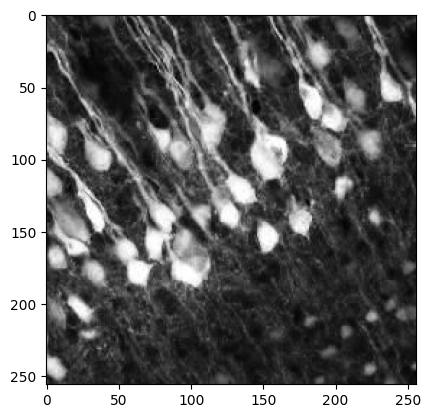

In [2]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [3]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

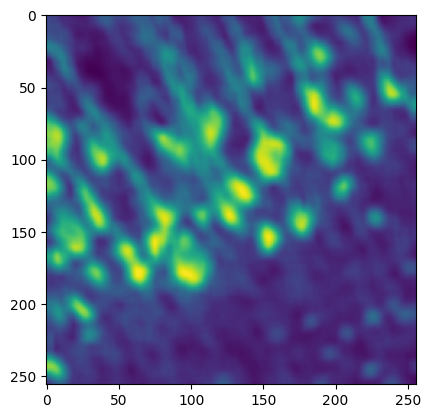

In [4]:
img_conv=conv(img, psf, mode="same", boundary="symm")
plt.imshow(img_conv)

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

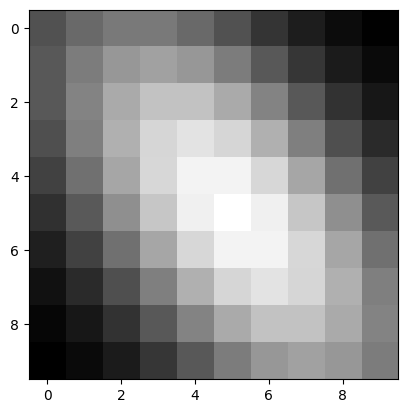

In [5]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

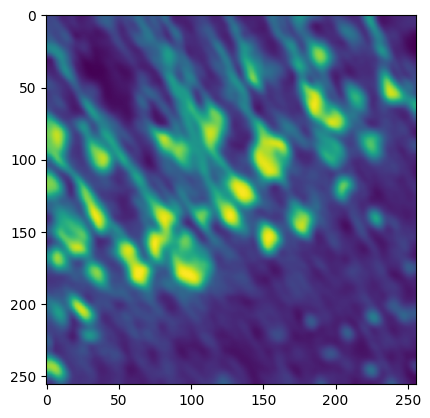

In [6]:
gaussian_psf = create_psf(psf_size)
img_conv_gaussian=conv(img, gaussian_psf, mode="same", boundary="symm")
plt.imshow(img_conv_gaussian)

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [15]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    psf_flipped=np.flip(psf)
    for t in range (n_iterations):
        #Step 1: Compute the blurred version of h^(t) (h^(t) * P)
        h_blurred=conv(img_deconv, psf, mode='same', boundary='symm')
        # Step 2: Compute the ratio g / (h^(t) * P)
        relative_blur = image/ (h_blurred + 1e-8)
        # Step 3: Convolve the ratio with the flipped PSF (P*)
        correction = conv(relative_blur, psf_flipped, mode='same', boundary='symm')
        # Step 4: Update h^(t+1)
        img_deconv *= correction  # Element-wise multiplication
    
    
    

    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

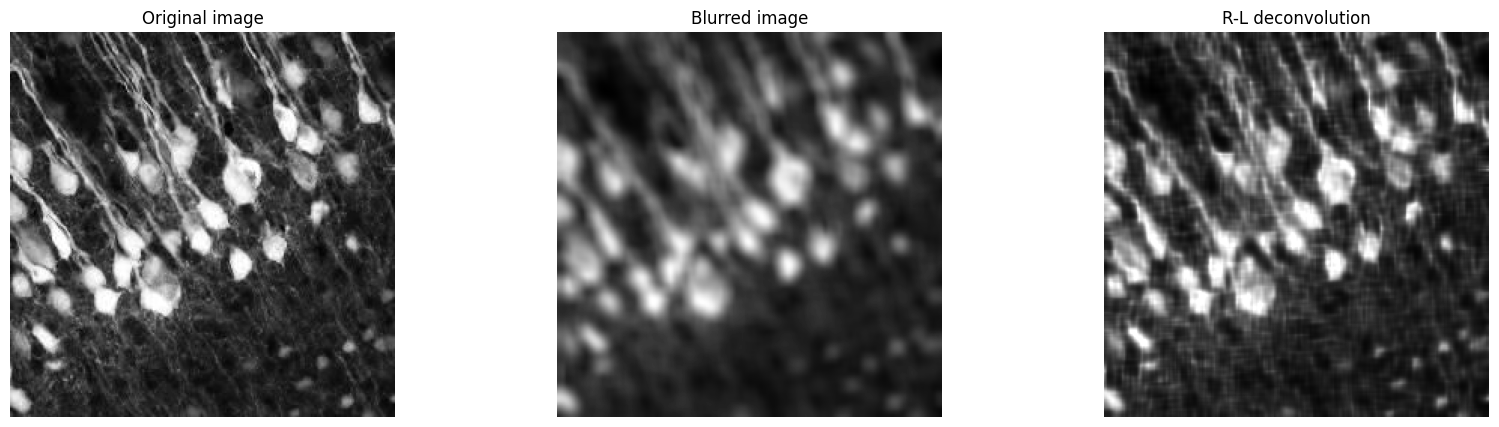

In [22]:
deconvolved_image = richardson_lucy_deconvolution(img_conv, psf, 100)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_conv, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(deconvolved_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [28]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 20
noise = noise / reduce_factor

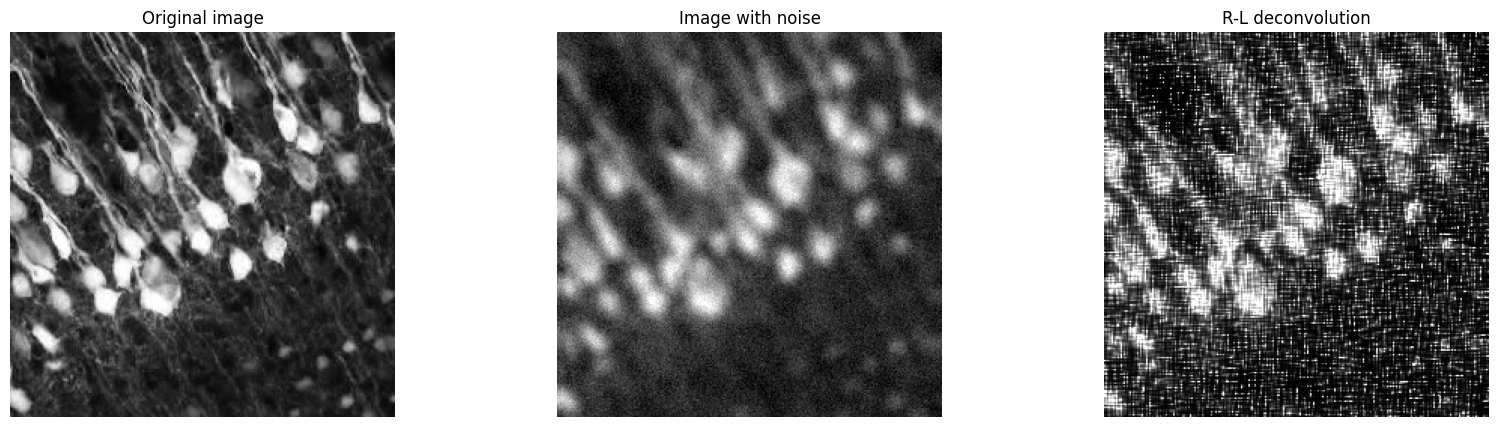

In [29]:
img_noise= img_conv + noise
img_noise = img_noise.clip(0,1)
img_noise_rl = richardson_lucy_deconvolution(img_noise, psf, 100)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_noise, 'gray')
plt.title('Image with noise')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_noise_rl, 'gray')
plt.title('R-L deconvolution')
plt.show()


**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

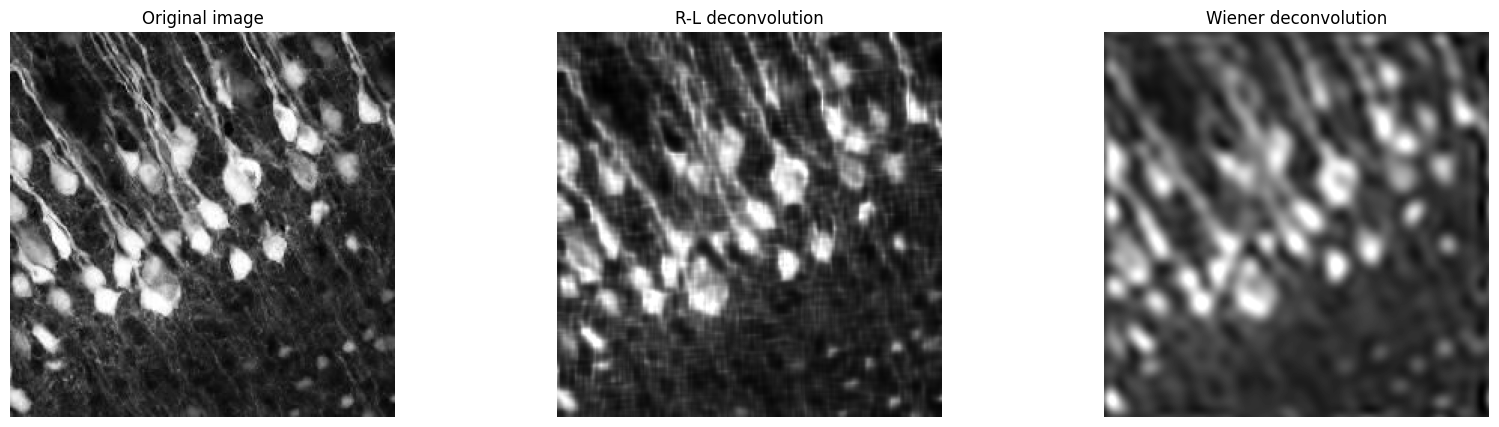

In [34]:
img_wiener= wiener(img_conv, psf, balance=2, clip=True)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(deconvolved_image, 'gray')
plt.title('R-L deconvolution')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('Wiener deconvolution')
plt.show()


**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

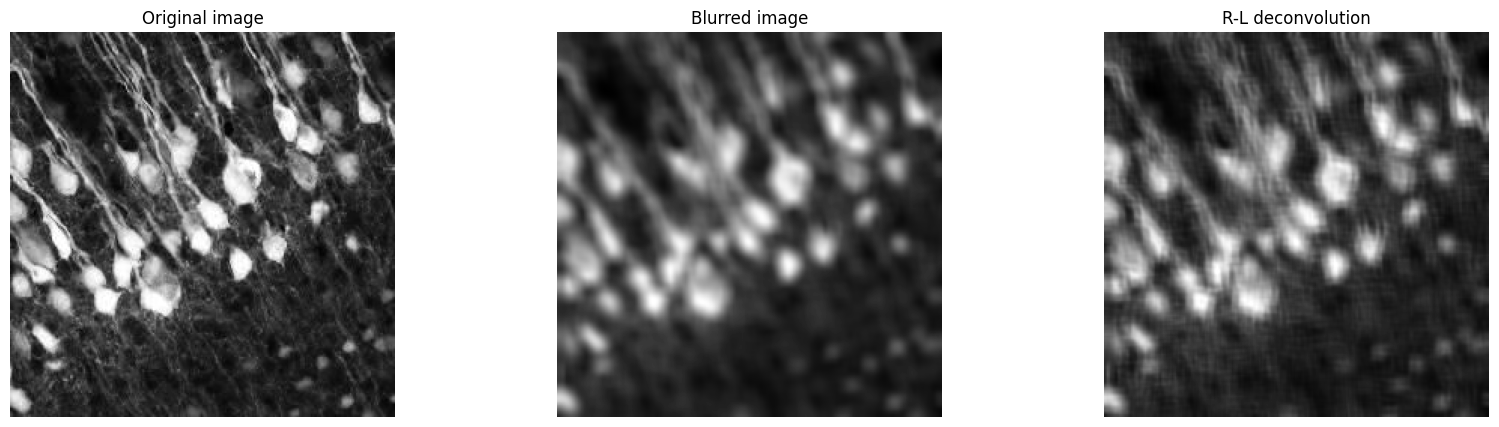

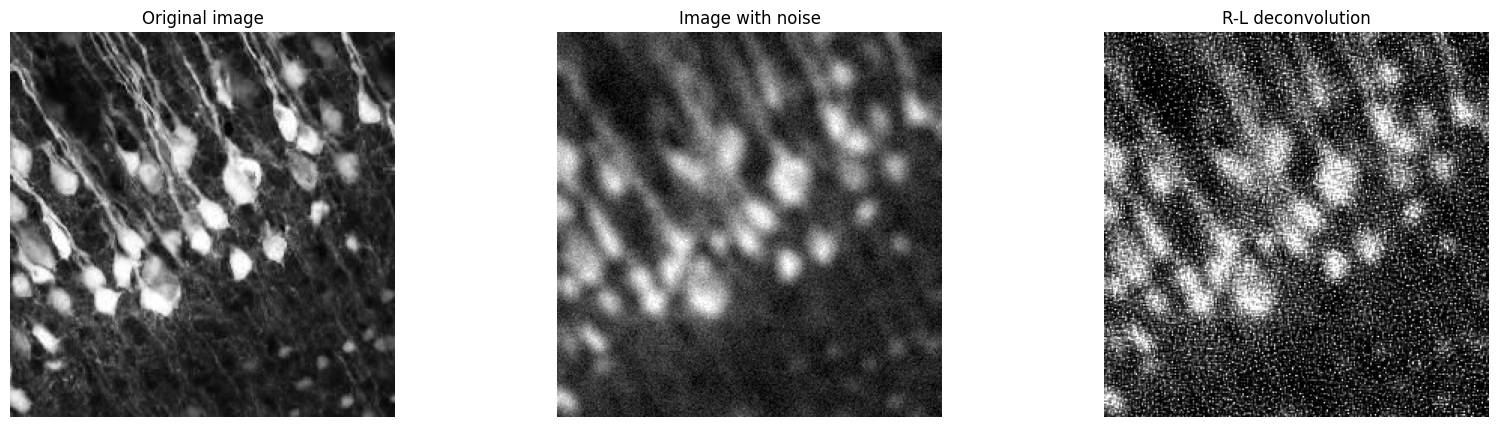

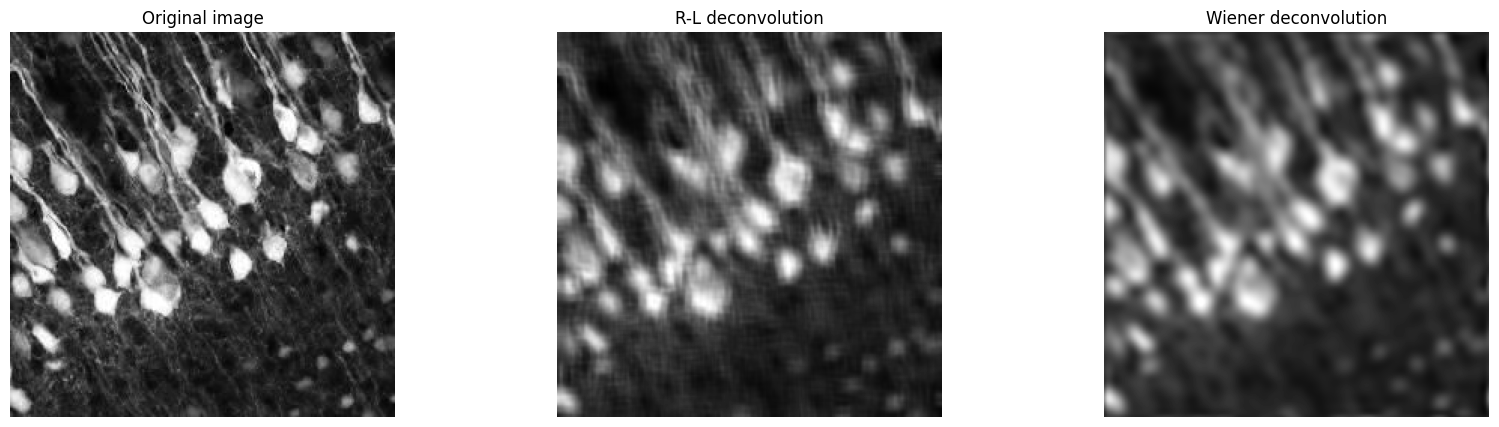

In [37]:
#smaller size of psf 
psf_size = 5
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

#repeat 4

deconvolved_image = richardson_lucy_deconvolution(img_conv, psf, 100)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_conv, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(deconvolved_image, 'gray')
plt.title('R-L deconvolution')
plt.show()

#repeat 5
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 20
noise = noise / reduce_factor

img_noise= img_conv + noise
img_noise = img_noise.clip(0,1)
img_noise_rl = richardson_lucy_deconvolution(img_noise, psf, 100)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_noise, 'gray')
plt.title('Image with noise')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_noise_rl, 'gray')
plt.title('R-L deconvolution')
plt.show()

#repeat 6
img_wiener= wiener(img_conv, psf, balance=2, clip=True)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(deconvolved_image, 'gray')
plt.title('R-L deconvolution')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('Wiener deconvolution')
plt.show()



**[Task 8.]()** Use a wrong PSF to restore the image

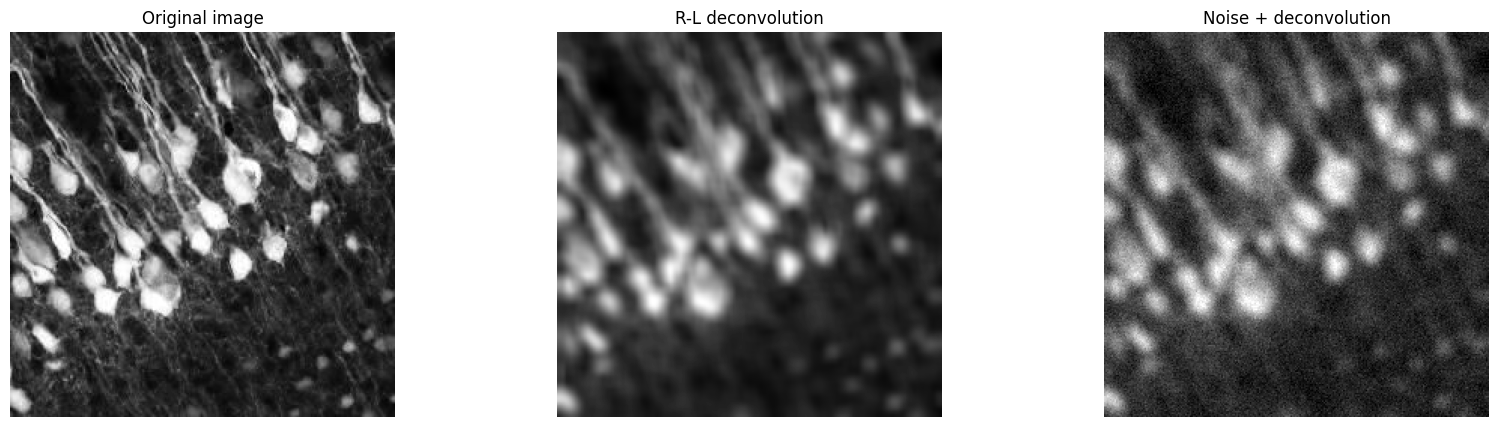

In [38]:
psf_size = 1
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

deconvolved_image2 = richardson_lucy_deconvolution(img_conv, psf, 100)
img_noise_rl2 = richardson_lucy_deconvolution(img_noise, psf, 100)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(deconvolved_image2, 'gray')
plt.title('R-L deconvolution')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_noise_rl2, 'gray')
plt.title('Noise + deconvolution')
plt.show()
